# KNN Model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from scipy.stats import sem, t
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score


In [5]:
df = pd.read_csv("atmospheric_weather_preprocessed.csv")
df.head(2)

,temperature,humidity,pressure,image
0,209.477417,3.186864,18499.99771,0
1,209.747436,3.067529,18499.99771,0


In [7]:
X = df.drop("image", axis=1)
y = df["image"]
# Split data the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
# Define the KNN classifier and tune parameter
knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# Perform grid search cross-validation for parameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [9]:
# Perform grid search cross-validation for parameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#best model
best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X_test, y_test, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()
sem_accuracy = sem(scores)

# Calculate the confidence interval
confidence = 0.95
n = len(scores)
t_value = t.ppf((1 + confidence) / 2, n - 1)
margin_of_error = t_value * sem_accuracy
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error
print("Accuracy:", mean_accuracy)
print("CI: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

# Calculate kappa score
kappa = cohen_kappa_score(y_test, predictions)

# Print kappa score
print("Kohen's Kappa:", kappa)

Accuracy: 0.5416071428571427
CI: [0.4905, 0.5927]


NameError: name 'predictions' is not defined

In [10]:

# Print the best parameter values
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [53]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

#review performance score
roc_score = roc_auc_score(y_test, y_pred)
print("ROC Score:", roc_score)


              precision    recall  f1-score   support

           0       0.61      0.64      0.62       434
           1       0.55      0.52      0.53       369

    accuracy                           0.58       803
   macro avg       0.58      0.58      0.58       803
weighted avg       0.58      0.58      0.58       803

ROC Score: 0.57928702558915


In [51]:
# Calculate predicted probabilities for class 1
probs = best_model.predict_proba(X_test)[:, 1]
# Calculate false positive rate (fpr) and true positive rate (tpr) for plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

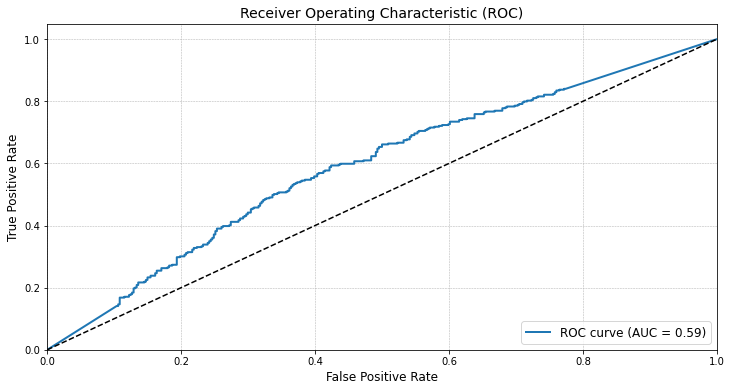

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc), linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=12)

# Show the plot
plt.show()